####  Exploratory Data Analysis

In [1]:
# imports
import os
from pathlib import Path

import requests
import numpy as np
import pandas as pd

from scipy.stats import median_abs_deviation
from scipy.stats import zscore

import matplotlib.pyplot as plt
import seaborn as sns

# import pandas_profiling
# from pandas_profiling.utils.cache import cache_file

### Data cleaning and profiling

In [2]:
# Loading data
ae_df = pd.read_csv(r'/Users/camilods16/Documents/Project-2-AmEx-Credit-Card-Default-/Project-2-AmEx-Credit-Card-Default-/data/processed/amex_clean_data.csv')

In [3]:
# enabling widgets for pandas profiling 
!jupyter nbextension enable --py widgetsnbextension

Traceback (most recent call last):
  File "/Users/camilods16/opt/anaconda3/envs/sb/bin/jupyter-nbextension", line 10, in <module>
    sys.exit(main())
  File "/Users/camilods16/opt/anaconda3/envs/sb/lib/python3.8/site-packages/jupyter_core/application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "/Users/camilods16/opt/anaconda3/envs/sb/lib/python3.8/site-packages/traitlets/config/application.py", line 978, in launch_instance
    app.start()
  File "/Users/camilods16/opt/anaconda3/envs/sb/lib/python3.8/site-packages/notebook/nbextensions.py", line 972, in start
    super().start()
  File "/Users/camilods16/opt/anaconda3/envs/sb/lib/python3.8/site-packages/jupyter_core/application.py", line 258, in start
    self.subapp.start()
  File "/Users/camilods16/opt/anaconda3/envs/sb/lib/python3.8/site-packages/notebook/nbextensions.py", line 882, in start
    self.toggle_nbextension_python(self.extra_args[0])
  File "/Users/camilods16/opt/anaco

In [4]:
#resetting index and dropping column unnamed
ae_df.reset_index(drop=True, inplace=True)
ae_df.drop('Unnamed: 0', axis=1, inplace=True)

#### Implementing a pandas profile for the dataframe:

In [5]:
# profile = ae_df.profile_report(title='American Express - Pandas Profiling', sort='descending', html={'style':{'full_width': True}}, progress_bar=False)
# profile.to_file(output_file='AmEx_pandas_profiling.html')

The profile of the American Express dataframe is saved in the root directory of the project. It serves as complement of this notebook.

In [6]:
ae_df.columns

Index(['customer_id', 'age', 'gender', 'owns_car', 'owns_house',
       'no_of_children', 'net_yearly_income', 'no_of_days_employed',
       'occupation_type', 'total_family_members', 'migrant_worker',
       'yearly_debt_payments', 'credit_limit', 'credit_limit_used(%)',
       'credit_score', 'prev_defaults', 'default_in_last_6months',
       'credit_card_default'],
      dtype='object')

Treating the missing values we had pending from the prior step. I will replace with mode on categorical variables.

In [7]:
missing_val = pd.concat([ae_df.isnull().sum(), 100 * ae_df.isnull().mean()], axis=1)
missing_val.columns=['count', '%']
missing_val.sort_values(by='count', ascending=False)

,count,%
yearly_debt_payments,95,0.208663
credit_score,8,0.017572
customer_id,0,0.000000
age,0,0.000000
default_in_last_6months,0,0.000000
prev_defaults,0,0.000000
credit_limit_used(%),0,0.000000
credit_limit,0,0.000000
migrant_worker,0,0.000000
total_family_members,0,0.000000


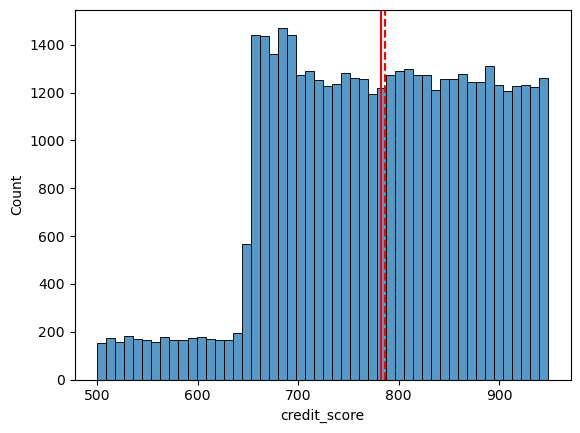

In [8]:
sns.histplot(data=ae_df, x='credit_score')
plt.axvline(ae_df['credit_score'].median(), color='r', linestyle='--')
plt.axvline(ae_df['credit_score'].mean(), color='r', linestyle='-')
plt.show()

Replacing the missing values in the column credit score with its mean

In [9]:
ae_df[ae_df['credit_score'].isna() == True]

,customer_id,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
2428,CST_158226,35,M,N,N,0.0,123818.30,503.0,Drivers,2.0,0.0,29352.74,31033.98,62,NaN,0,0,0
4352,CST_165659,27,F,Y,Y,0.0,199174.42,2067.0,Laborers,2.0,0.0,15608.86,35796.50,68,NaN,0,0,0
7384,CST_124436,50,M,N,N,0.0,332714.21,1061.0,Sales staff,1.0,0.0,32973.57,52213.67,62,NaN,0,0,0
16180,CST_119729,24,F,N,Y,0.0,244882.10,455.0,Unknown,1.0,0.0,60867.31,63574.88,73,NaN,1,1,1
18873,CST_133555,42,M,Y,Y,0.0,228386.12,1382.0,Laborers,2.0,1.0,34579.76,64087.72,33,NaN,0,0,0
19951,CST_118114,32,F,N,Y,0.0,146287.81,1948.0,Unknown,2.0,0.0,28426.08,49628.48,48,NaN,0,0,0
29076,CST_143867,50,F,N,Y,0.0,220868.01,365250.0,Unknown,1.0,0.0,8616.70,69047.56,30,NaN,0,0,0
35736,CST_125991,35,F,N,N,2.0,227682.89,4190.0,Unknown,4.0,0.0,42300.34,37956.84,46,NaN,0,0,0


In [10]:
ae_df['credit_score'].mask(ae_df['credit_score'].isna() == True, ae_df['credit_score'].mean(), inplace=True)
ae_df['credit_score'].isna().sum()

0

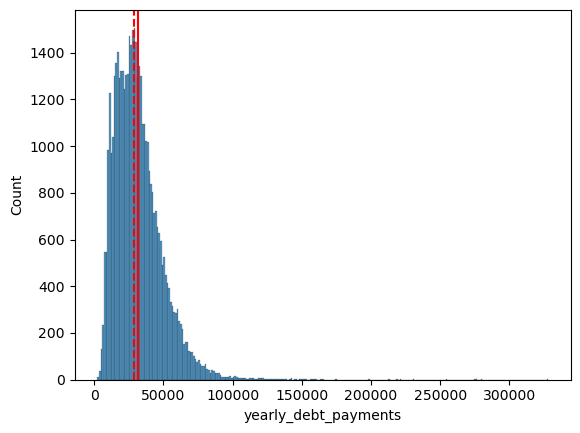

In [11]:
sns.histplot(data=ae_df, x='yearly_debt_payments')
plt.axvline(ae_df['yearly_debt_payments'].median(), color='r', linestyle='--')
plt.axvline(ae_df['yearly_debt_payments'].mean(), color='r', linestyle='-')
plt.show()

In [12]:
ae_df['yearly_debt_payments'].mask(ae_df['yearly_debt_payments'].isna() == True, ae_df['yearly_debt_payments'].median(), inplace=True)
ae_df['yearly_debt_payments'].isna().sum()

0

In [23]:
# Renaming column
ae_df.rename(columns={'credit_limit_used(%)':'credit_limit_used_ptg'}, inplace=True)
ae_df

### Visualization of variables 

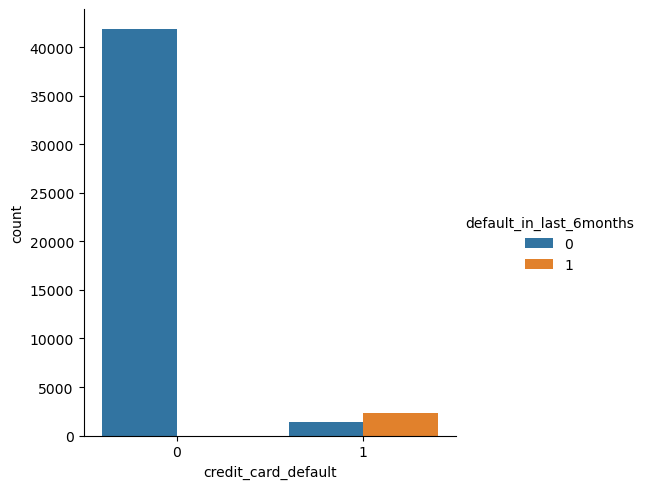

In [163]:
sns.catplot(kind='count', data=ae_df, x='credit_card_default', hue='default_in_last_6months')

#### Exploring outliers 

In the next steps, I will explore outliers that were noted in the previous notebook. Then, I will treat the outliers if any found and proceed with the explorations of relationships between variables.

##### Numerical Variables Outliers

Creating a function to separate variables keeping in mind a few columns that are categorical binary variables.

In [26]:
# Function to separate values to explore outliers and relationships in both categorical, numerical
def separate_variables(data):
    # separating numerical data from df
    numerical_d = [i for i in ae_df.columns if ae_df[i].dtypes != 'object']
    numerical_d = ae_df[numerical_d]
    # slicing dcategorical binary data from numerical data
    d_numerical = numerical_d[['no_of_children','total_family_members','migrant_worker','prev_defaults','default_in_last_6months']]
    # dropping above columns from numerical data
    numerical_d.drop(['no_of_children','total_family_members','migrant_worker','prev_defaults','default_in_last_6months'],axis=1,inplace=True)
    # separating categorical data from df
    categorical_d = [i for i in ae_df.columns if ae_df[i].dtype == 'object']
    categorical_d = ae_df[categorical_d]
    # joining the categorical binary variables with categorical data
    categorical_d = pd.concat([categorical_d,d_numerical],axis=1)
    # returning numerical and categorical dfs
    return numerical_d, categorical_d

In [27]:
# testing the function
amex_numerical_d, amex_categorical_d = separate_variables(ae_df)

/var/folders/fk/kvpxv24d2ys_slgf4kqk23f40000gn/T/ipykernel_832/1734671725.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_d.drop(['no_of_children','total_family_members','migrant_worker','prev_defaults','default_in_last_6months'],axis=1,inplace=True)


In [34]:
# exploring the new dfs
amex_categorical_d.head(5)
amex_categorical_d.columns
amex_categorical_d.drop(['customer_id'], axis=1, inplace=True)

In [35]:
# exploring the new dfs
amex_numerical_d.sample(5)

,age,net_yearly_income,no_of_days_employed,yearly_debt_payments,credit_limit,credit_limit_used_ptg,credit_score,credit_card_default
40832,40,145671.45,365244.0,30512.76,36183.50,97,752.0,0
37162,29,201561.75,2050.0,39216.48,31866.76,70,534.0,1
3135,32,190531.88,1052.0,28111.24,39275.71,63,765.0,0
41939,27,193954.54,613.0,30030.78,30973.74,4,804.0,0
4654,33,264066.93,4013.0,32433.33,105399.03,72,812.0,0


Treating outliers in numerical variables with z-score method and replacing them for mean

In [179]:

# defining a function
threshold = 3
def outliers_(data):
    """function that identifies outliers by z method and replace them"""
    outlier = []
    mu = np.mean(data)
    sigma =  np.std(data)
    for i in data:
        z_score = (mu-i)/sigma
        if z_score > threshold:
            i = mu

In [180]:
for i in amex_numerical_d.columns:
    outliers_(amex_numerical_d[i])

In [146]:
amex_numerical_d.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45528.0,38.993411,9.543990,23.00,31.0000,39.000000,47.000000,5.500000e+01
net_yearly_income,45528.0,202433.510297,663451.578296,30176.76,187973.0350,200655.622249,200655.622249,1.407590e+08
no_of_days_employed,45528.0,67984.951579,139642.702987,2.00,946.7500,2208.500000,5840.000000,3.652520e+05
yearly_debt_payments,45528.0,31791.299458,17252.144640,2237.47,19240.2625,29081.650000,40535.472500,3.281129e+05
credit_limit,45528.0,43548.416028,148784.686878,4003.14,23973.8050,35688.045000,53435.762500,3.112997e+07
credit_limit_used_ptg,45528.0,52.235020,29.376910,0.00,27.0000,54.000000,78.000000,9.900000e+01
credit_score,45528.0,782.791257,100.610905,500.00,704.0000,786.000000,867.000000,9.490000e+02
credit_card_default,45528.0,0.081203,0.273149,0.00,0.0000,0.000000,0.000000,1.000000e+00


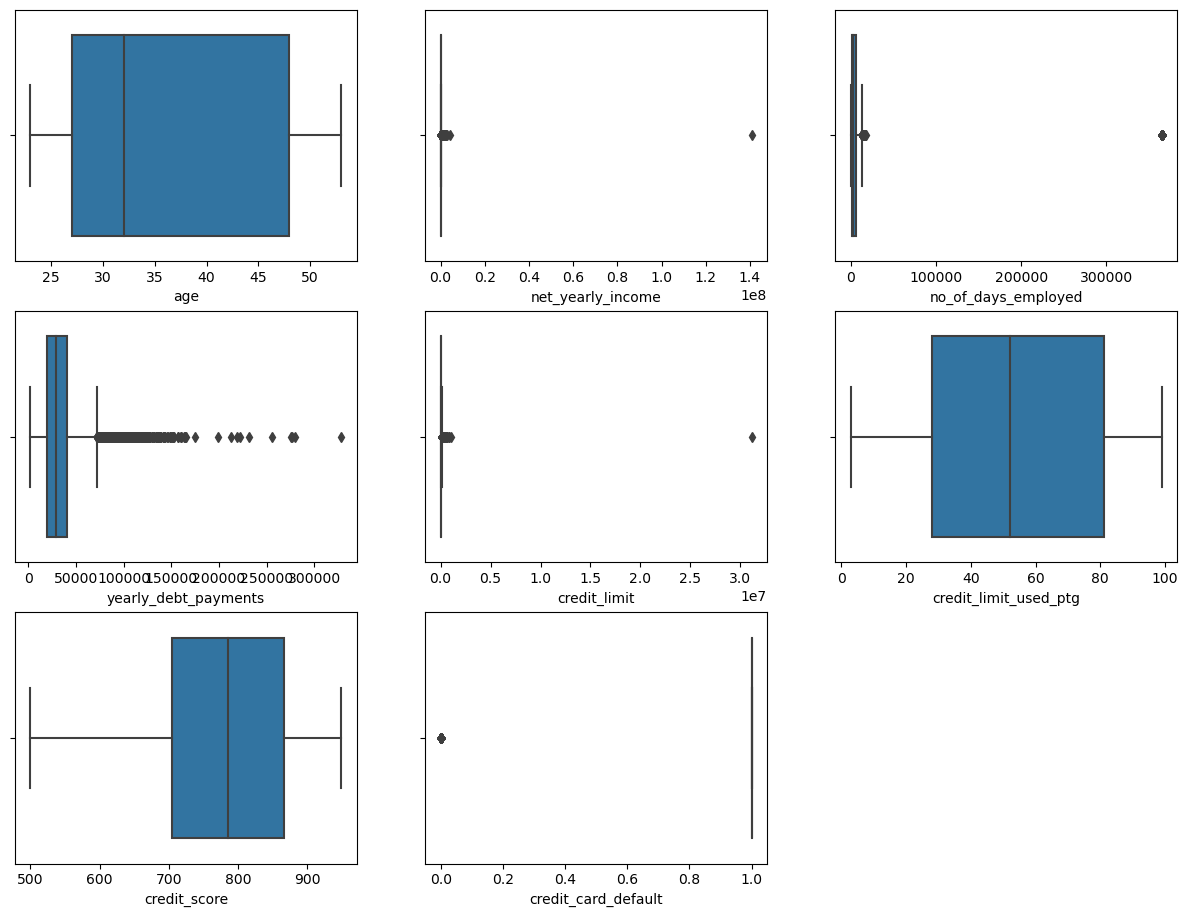

In [181]:
plt.figure(figsize=(15,15))
for i in enumerate(amex_numerical_d.columns):
    plt.subplot(4,3,i[0]+1)
    sns.boxplot(data=amex_numerical_d[i[1]], x=amex_numerical_d[i[1]])
    plt.xlabel(i[1])

#### Categorical Variables & Binary Categorical Distribution

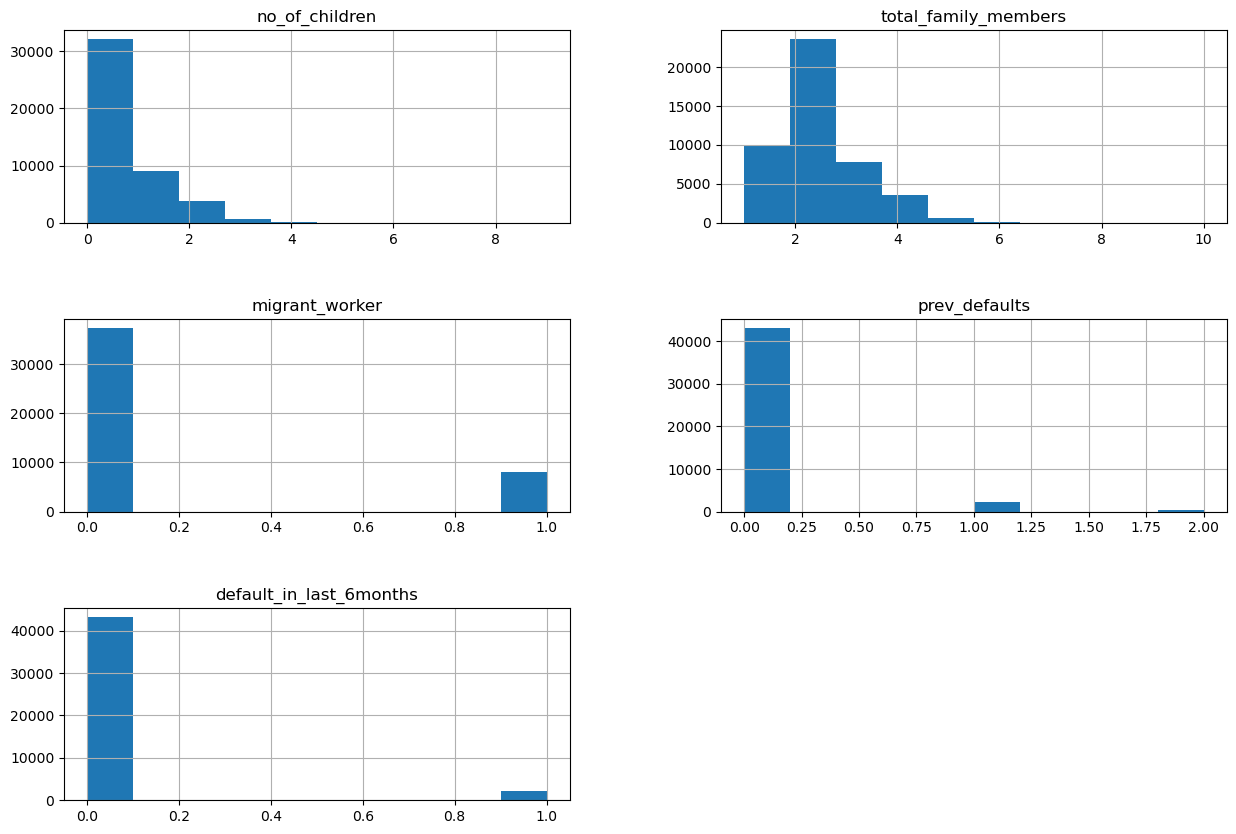

In [164]:
amex_categorical_d.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

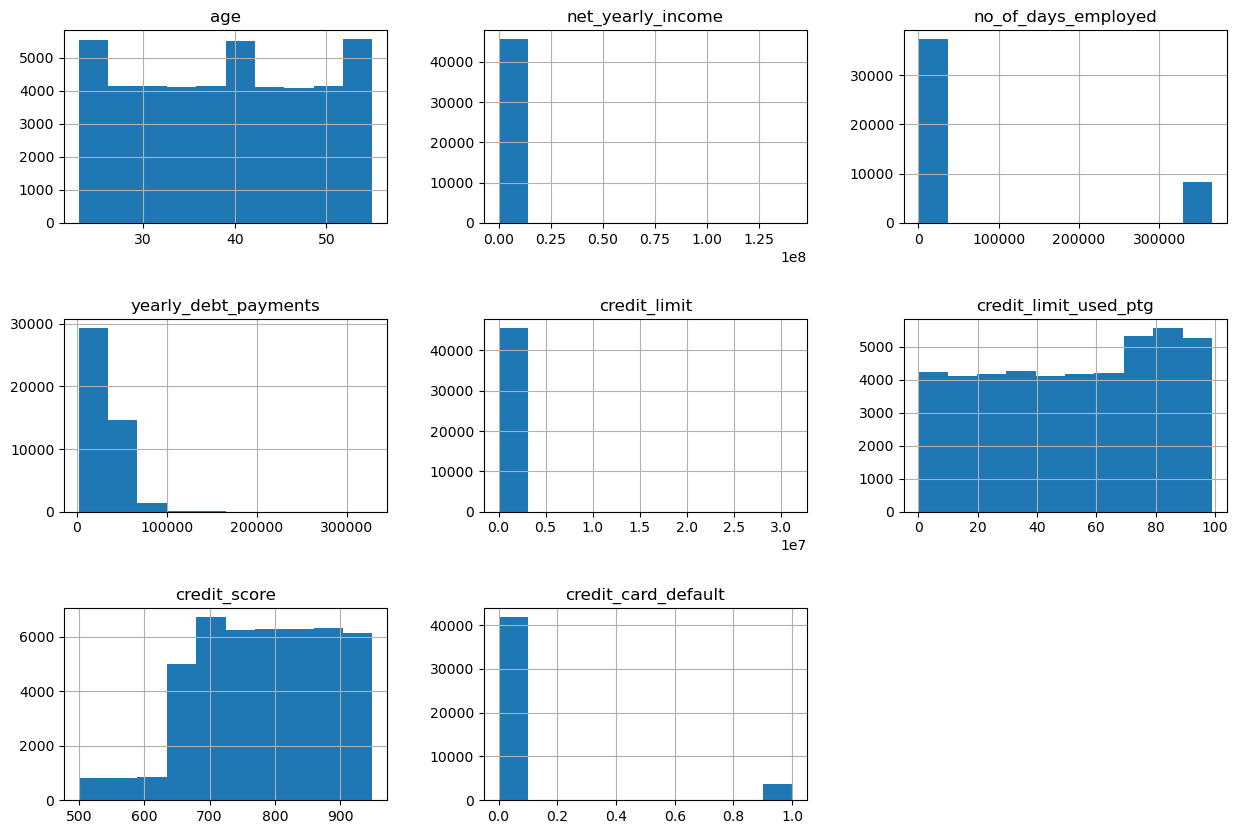

In [165]:
plt.figure(figsize=(15,15))
for i in enumerate(numerical_data.columns):
    plt.subplot(4,3,i[0]+1)
    sns.boxplot(data=numerical_data[i[1]], x=numerical_data[i[1]])
    plt.xlabel(i[1])

#### Visualization of relationships between variables: heatmap

Text(0.5, 1.0, 'Heatmap Matrix Correlation')

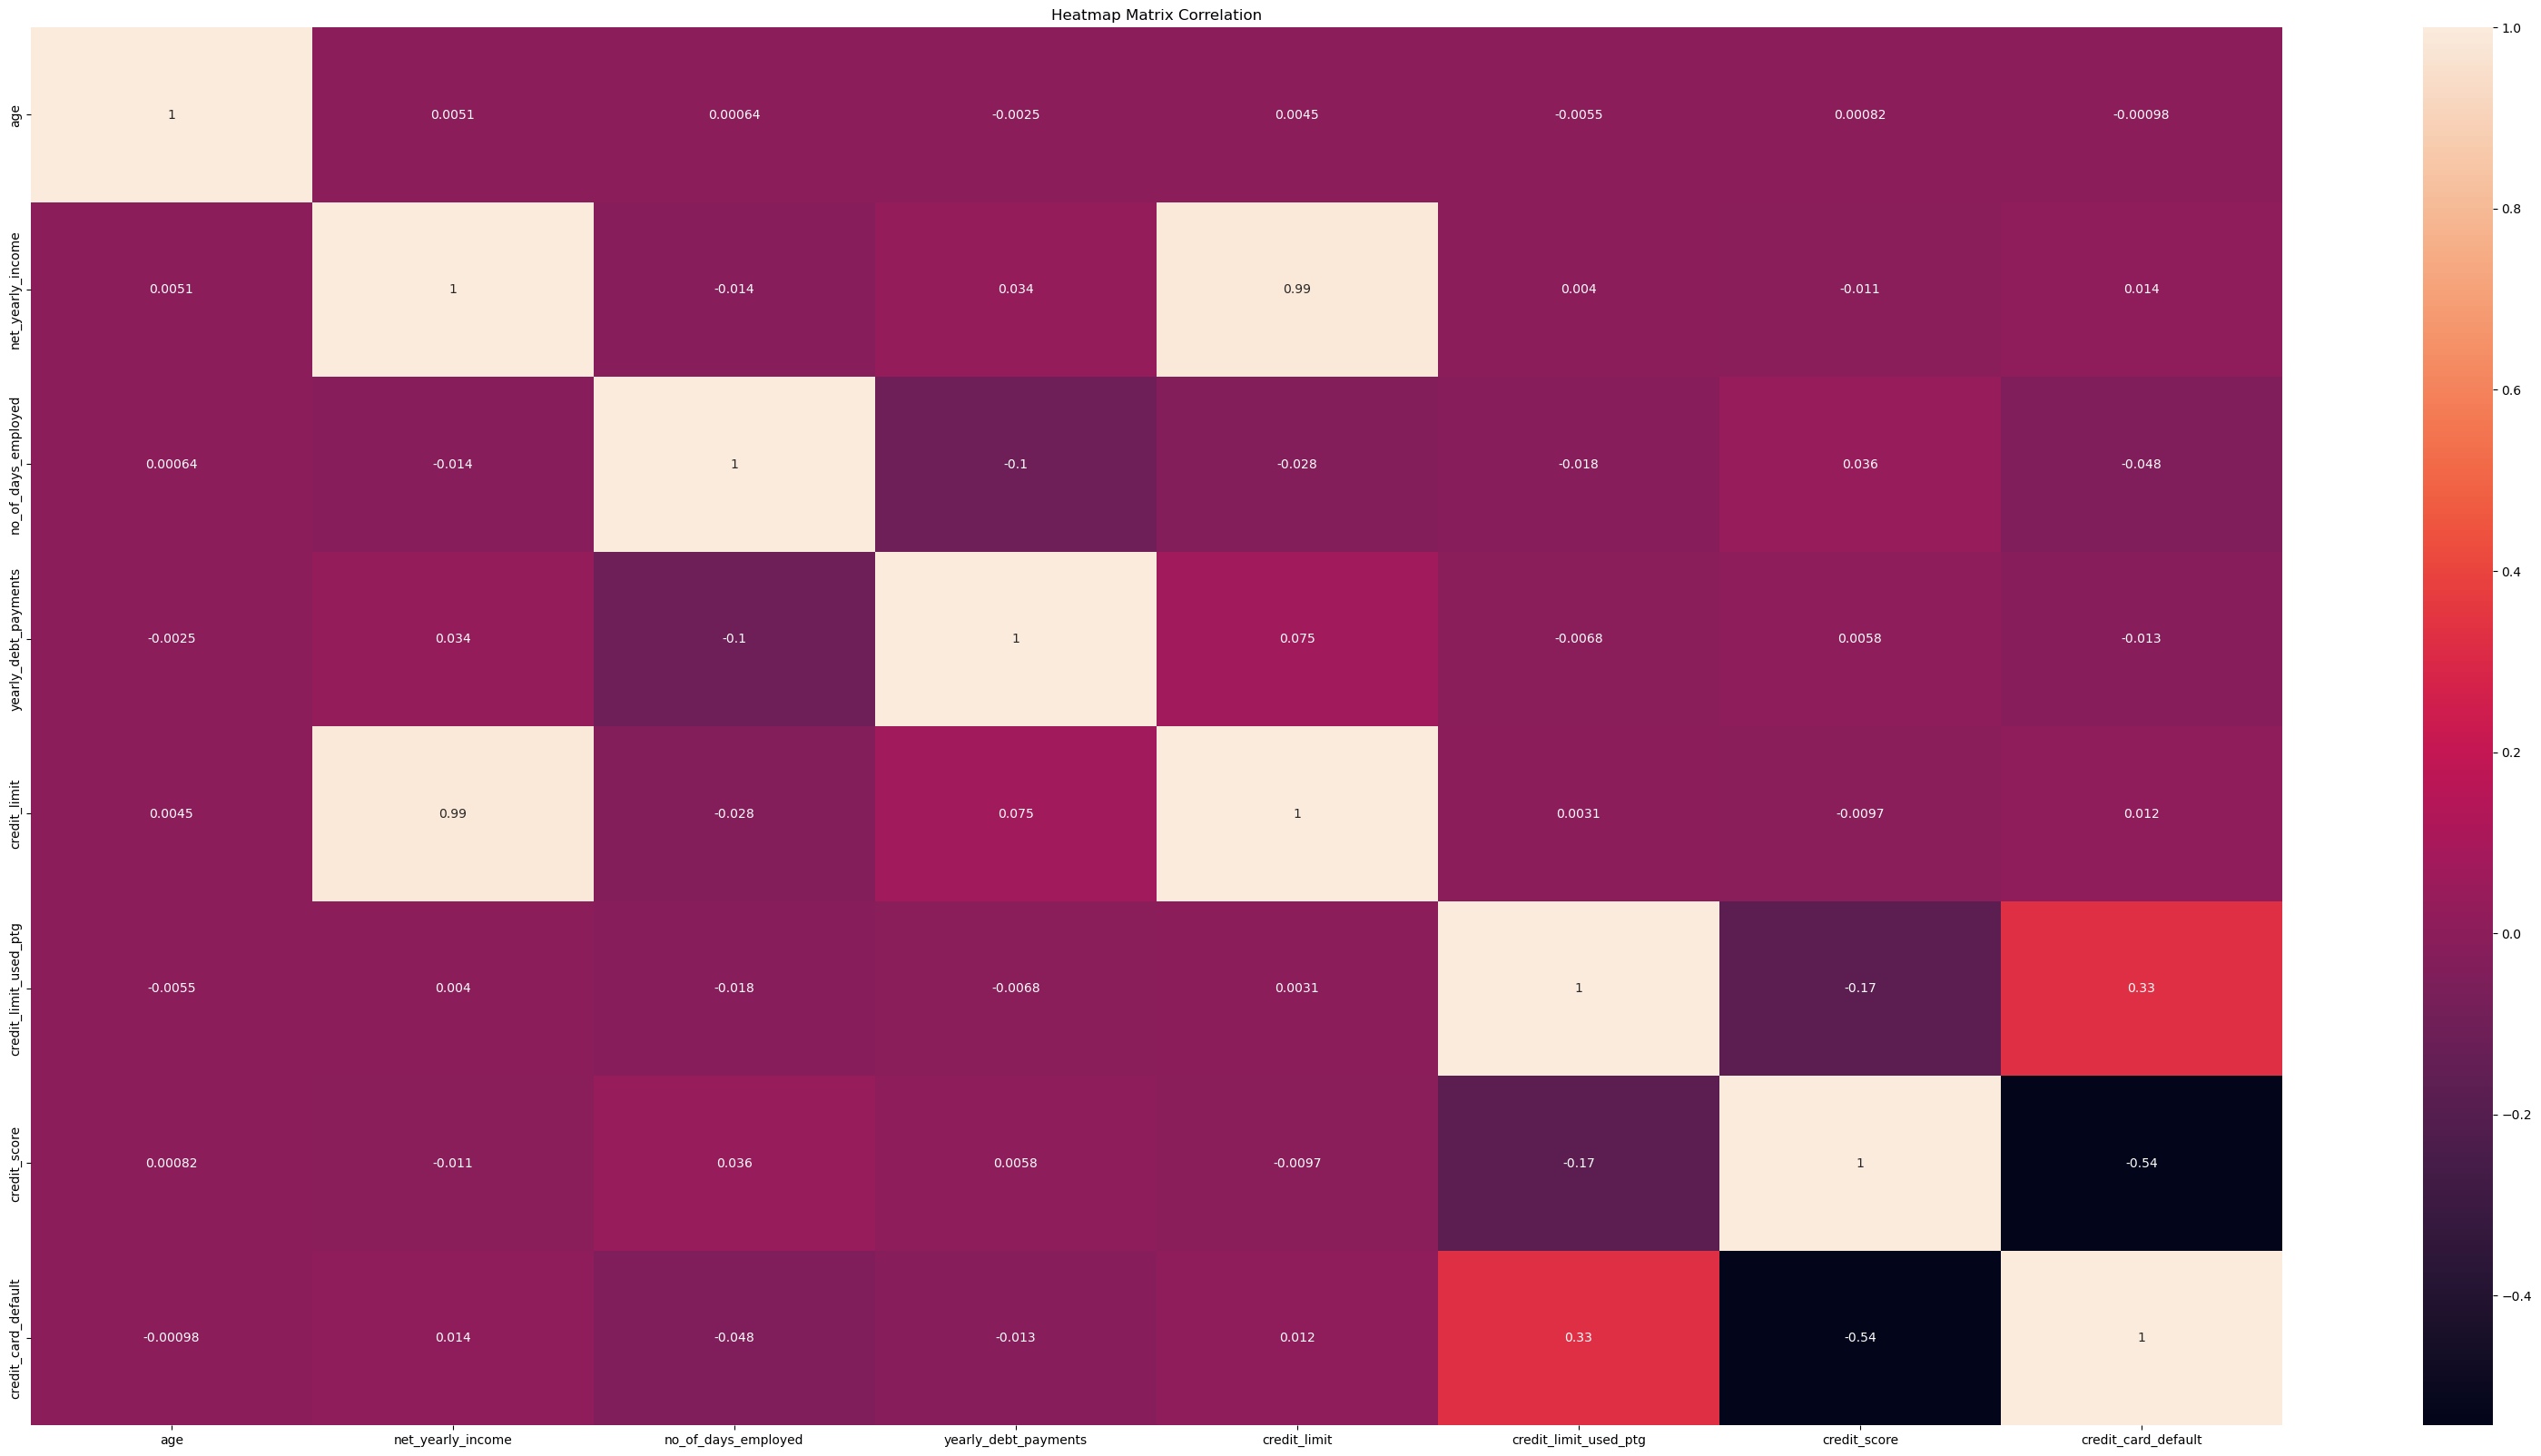

In [127]:
plt.figure(figsize=(40, 20))
sns.heatmap(amex_numerical_d.corr(), annot=True)
plt.title('Heatmap Matrix Correlation')

/var/folders/fk/kvpxv24d2ys_slgf4kqk23f40000gn/T/ipykernel_832/2170711494.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ae_df.corr(), annot=True)


<AxesSubplot: >

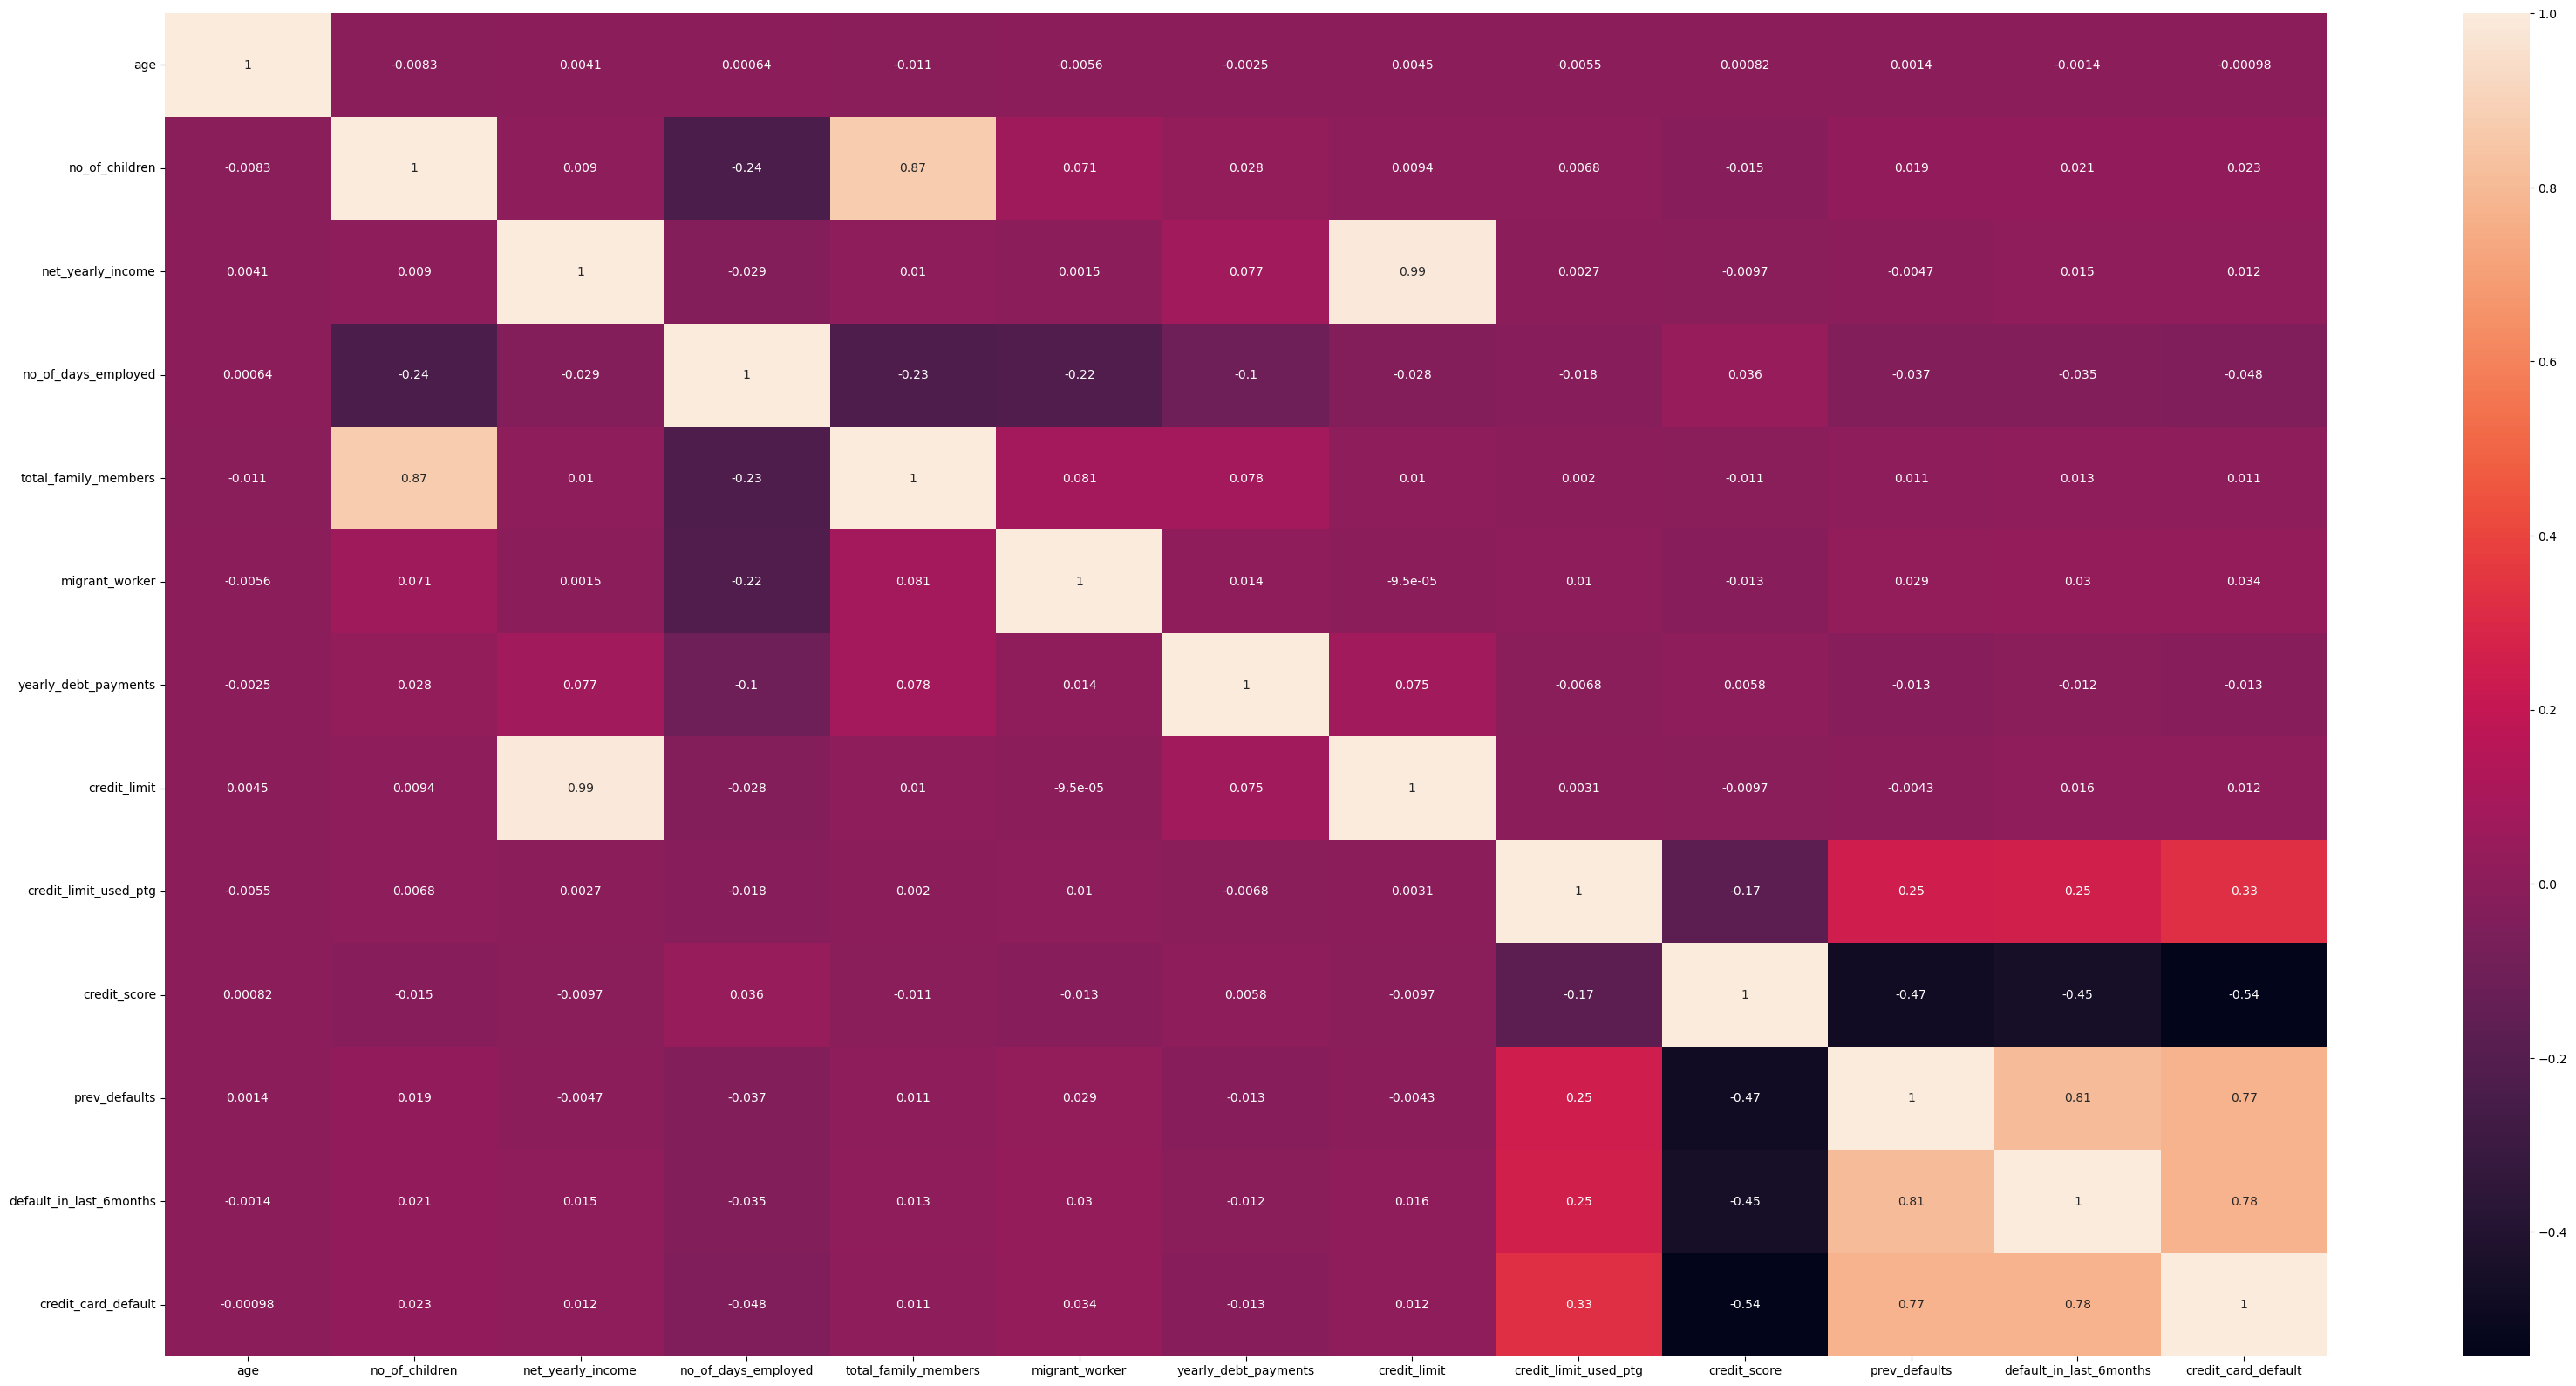

In [128]:
# creating a heatmap of the entire dataset
plt.figure(figsize=(40, 20))
sns.heatmap(ae_df.corr(), annot=True)

The heatmaps are showing the following relationships between variables: 

#### Numerical Heatmap:
    - Strong positive correlation between credit_limit and net_yearly_income
    - Moderate negative correlation between credit_card_default and credit score
    - Weak negative correlation between credit_card_default and credit_limit_used_ptg
#### AmEx DataFrame Heatmap:
    - Strong positive correlation between credit_card_default and default_in_last_6months and prev_defaults.
    - Moderate negative correlation between credit_score and credit_card_default, default_in_last_6months and prev_defaults.
The other correlations does not seem to have an influence over the scope of this project.

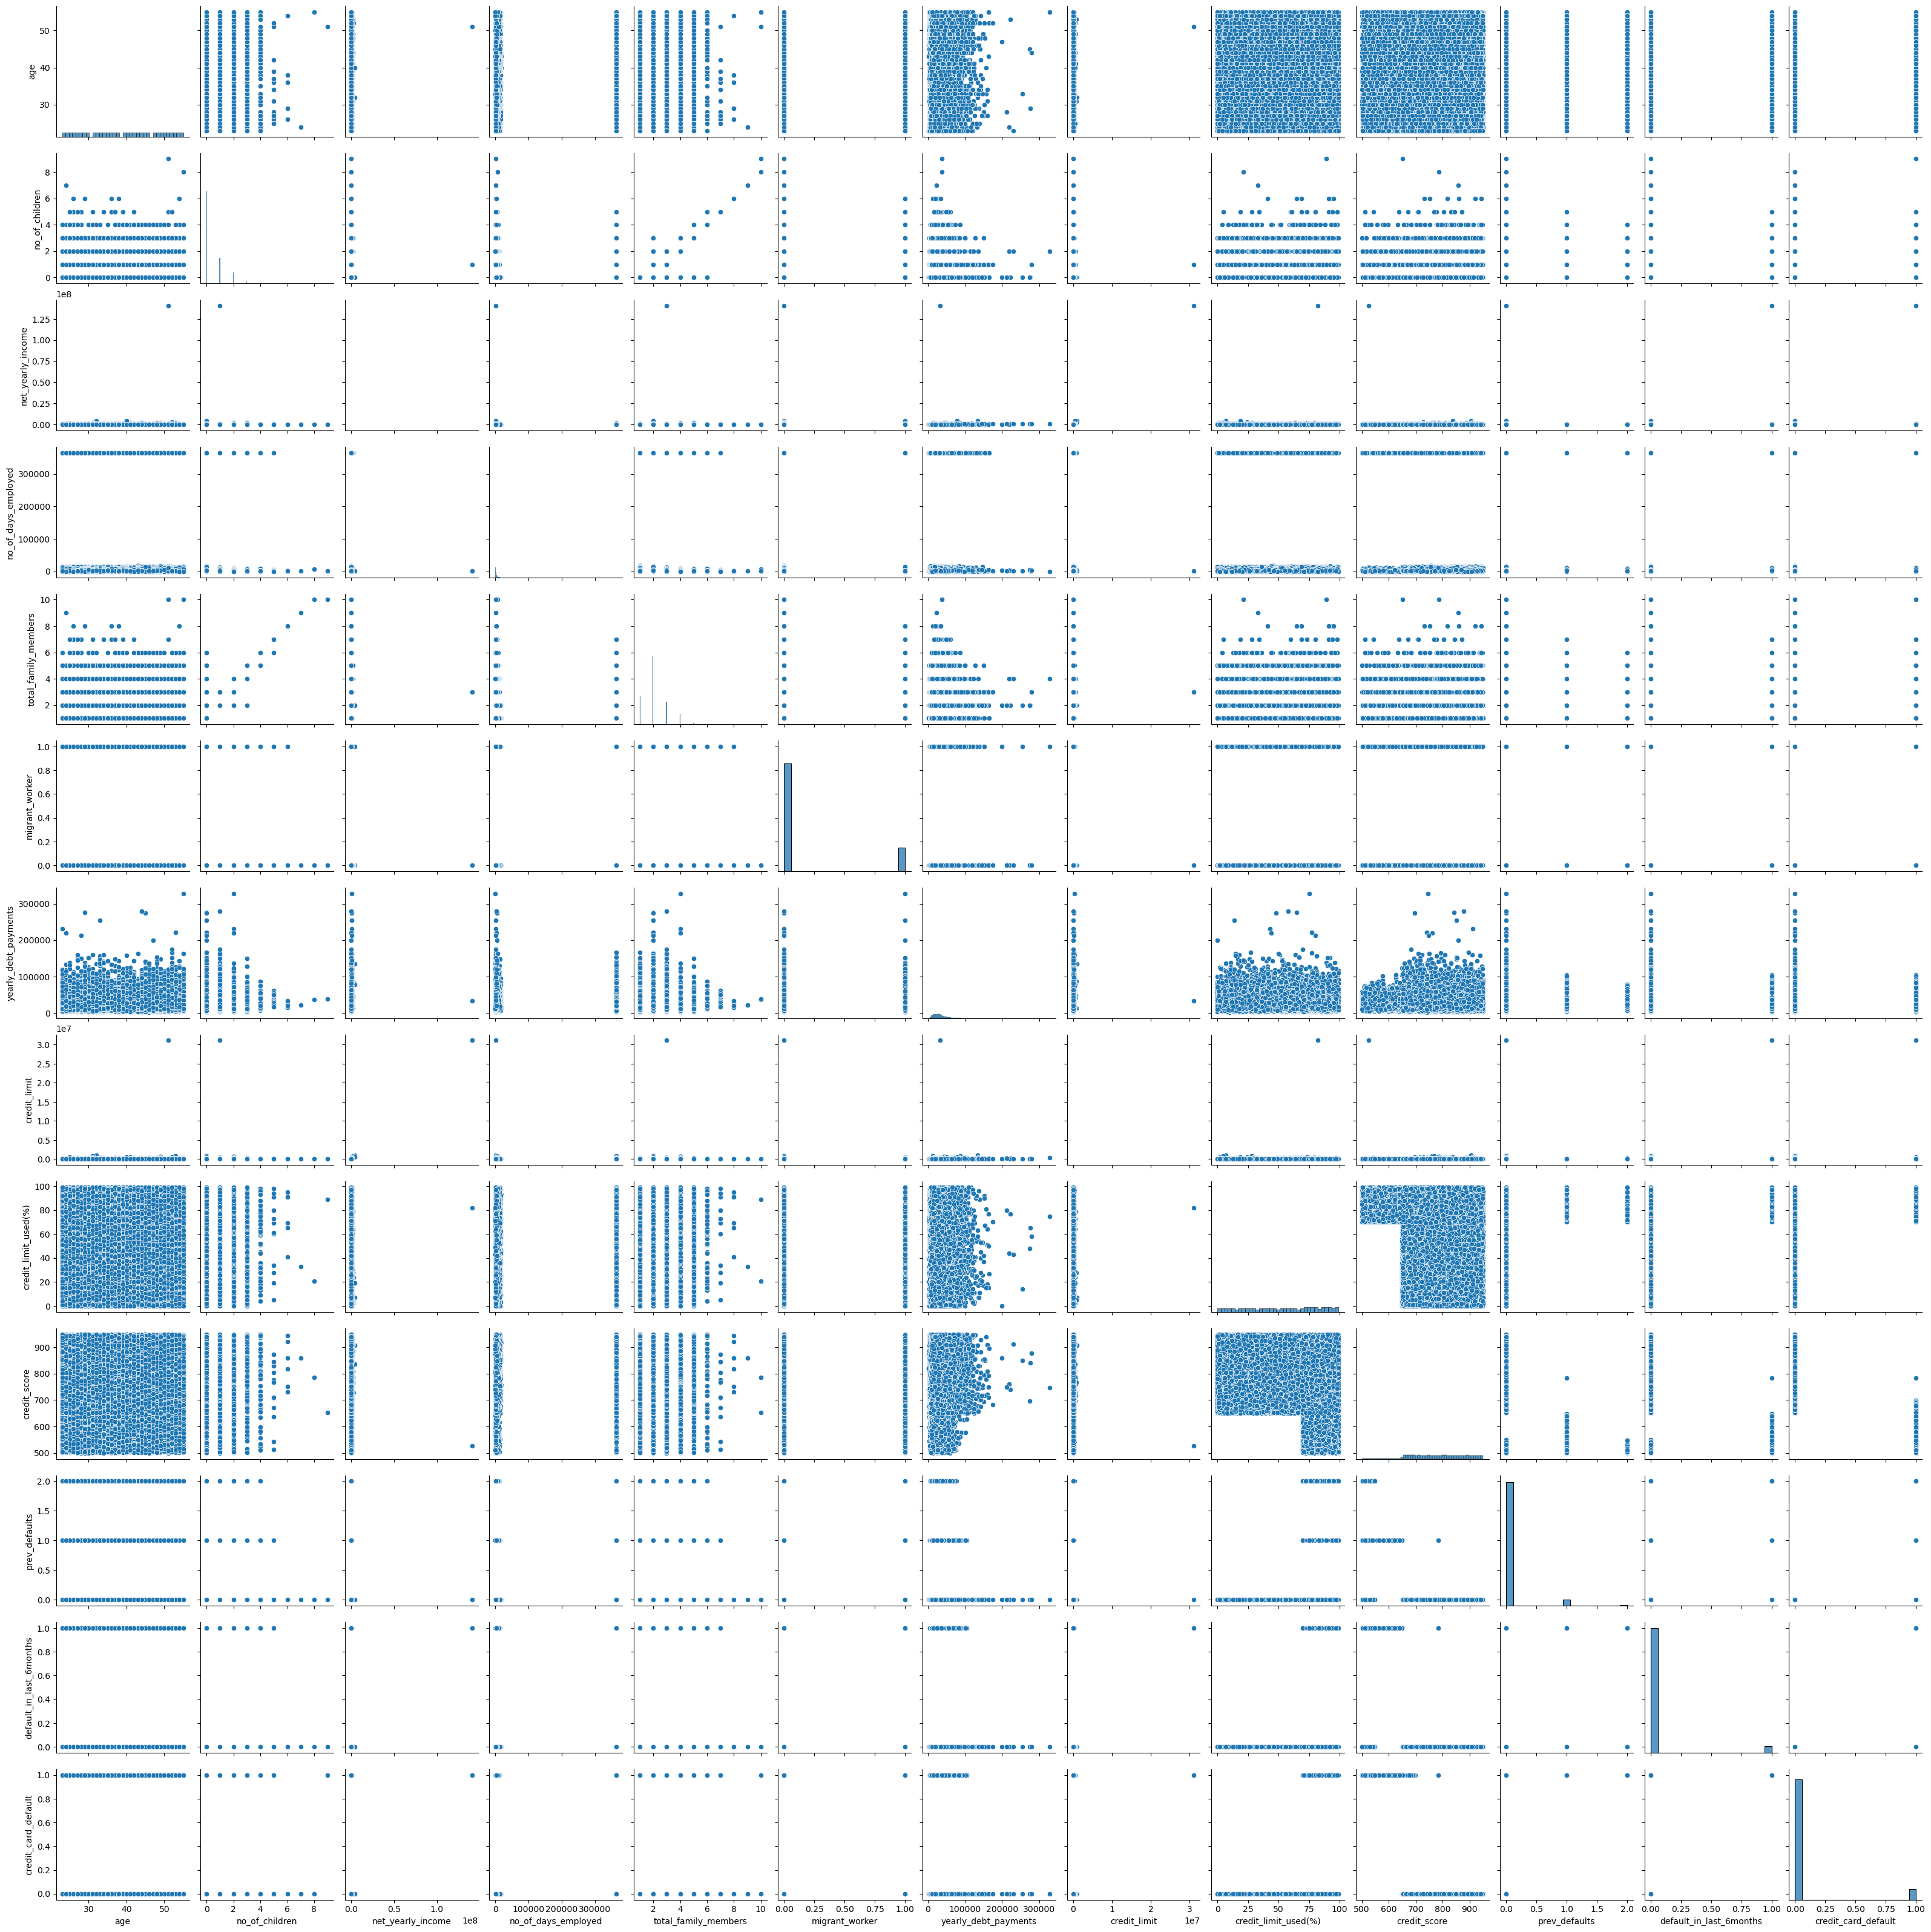

In [14]:
sns.pairplot(ae_df)